# **PREPARATION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# **EXPLORATORY DATA ANALYSIS**

In [3]:
# Import datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/Analysis/Indonesian Earthquake Data/[Raw]_2000-2006_Indonesian_Earthquake_Data_mag3+.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/Analysis/Indonesian Earthquake Data/[Raw]_2007-2015_Indonesian_Earthquake_Data_mag3+.csv')
dataset3 = pd.read_csv('/content/drive/MyDrive/Analysis/Indonesian Earthquake Data/[Raw]_2016-2022_Indonesian_Earthquake_Data_mag3+.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/Analysis/Indonesian Earthquake Data/[Raw]_2023-7 3 2025_Indonesian_Earthquake_Data_mag3+.csv')

# Merge all datasets
full_dataset = pd.concat([dataset1, dataset2, dataset3, dataset4], ignore_index=True)

# Display merged dataset info
print(full_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59571 entries, 0 to 59570
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             59571 non-null  object 
 1   latitude         59571 non-null  float64
 2   longitude        59571 non-null  float64
 3   depth            59571 non-null  float64
 4   mag              59571 non-null  float64
 5   magType          59571 non-null  object 
 6   nst              37930 non-null  float64
 7   gap              54807 non-null  float64
 8   dmin             28456 non-null  float64
 9   rms              59533 non-null  float64
 10  net              59571 non-null  object 
 11  id               59571 non-null  object 
 12  updated          59571 non-null  object 
 13  place            59571 non-null  object 
 14  type             59571 non-null  object 
 15  horizontalError  25970 non-null  float64
 16  depthError       40782 non-null  float64
 17  magError    

The dataset consists of **59,571 earthquake records**, covering various seismic events across different time periods. Each entry contains essential earthquake parameters, including **location (`latitude`, `longitude`, `depth`), `magnitude`, event type, and source details**. The merging process was executed successfully, ensuring that all datasets were combined seamlessly without any structural inconsistencies. The dataset now provides a comprehensive and unified view of earthquake events, making it suitable for further analysis and visualization.  

In [4]:
# Show merged dataset
full_dataset.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2000-01-01T07:50:00.390Z,8.370,126.336,100.7,4.5,mb,NaN,NaN,NaN,1.11,...,2014-11-07T01:09:15.190Z,"0 km SE of Hinatuan, Philippines",earthquake,NaN,7.1,NaN,1.0,reviewed,us,us
1,2000-01-02T12:46:58.770Z,5.642,125.140,73.7,4.9,mb,NaN,NaN,NaN,0.93,...,2014-11-07T01:09:16.352Z,"15 km WSW of Burias, Philippines",earthquake,NaN,5.5,NaN,23.0,reviewed,us,us
2,2000-01-02T18:43:31.940Z,1.902,127.137,33.0,4.4,mb,NaN,NaN,NaN,0.54,...,2014-11-07T01:09:16.671Z,"98 km W of Tobelo, Indonesia",earthquake,NaN,NaN,NaN,5.0,reviewed,us,us
3,2000-01-03T13:01:31.600Z,2.114,128.688,71.8,4.7,mb,NaN,NaN,NaN,1.00,...,2014-11-07T01:09:16.863Z,"86 km ENE of Tobelo, Indonesia",earthquake,NaN,15.3,NaN,1.0,reviewed,us,us
4,2000-01-03T14:32:15.850Z,-11.539,118.421,33.0,4.7,mb,NaN,NaN,NaN,1.50,...,2014-11-07T01:09:16.866Z,"289 km SW of Waingapu, Indonesia",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us


As we can see, the date and time columns in this dataset are not in a good form for analysis. The values are currently combined in a single column, making it less convenient for filtering, grouping, and visualization. To improve clarity and usability, the **`time`** and **`updated`** columns will be separated into two distinct components:  

- **`date`**: Represents the date of the earthquake event in the format **(YYYY-MM-DD)**.  
- **`time`**: Represents the time of the earthquake event in the format **(HH:MM:SS)**.  
- **`date_update`**: Represents the date when the event data was last updated **(YYYY-MM-DD)**.  
- **`time_update`**: Represents the time when the event data was last updated **(HH:MM:SS)**.  

By doing this, we can easily perform time-based analyses, such as daily trends, event distributions over time, and temporal pattern visualizations.

In [5]:
# Ensure columns are strings before splitting
full_dataset['time'] = full_dataset['time'].astype(str)
full_dataset['updated'] = full_dataset['updated'].astype(str)

# Extract 'date' and 'time' from 'time' column
full_dataset[['date', 'time']] = full_dataset['time'].str.split('T', expand=True)
full_dataset['time'] = full_dataset['time'].str.replace('Z', '', regex=False)  # Remove 'Z'
full_dataset['time'] = full_dataset['time'].apply(lambda x: x.split('.')[0] if isinstance(x, str) else x)  # Keep only HH:MM:SS

# Extract 'date_update' and 'time_update' from 'updated' column
full_dataset[['date_update', 'time_update']] = full_dataset['updated'].str.split('T', expand=True)
full_dataset['time_update'] = full_dataset['time_update'].str.replace('Z', '', regex=False)  # Remove 'Z'
full_dataset['time_update'] = full_dataset['time_update'].apply(lambda x: x.split('.')[0] if isinstance(x, str) else x)  # Keep only HH:MM:SS

# Display merged dataset info
full_dataset.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date,date_update,time_update
0,07:50:00,8.370,126.336,100.7,4.5,mb,NaN,NaN,NaN,1.11,...,NaN,7.1,NaN,1.0,reviewed,us,us,2000-01-01,2014-11-07,01:09:15
1,12:46:58,5.642,125.140,73.7,4.9,mb,NaN,NaN,NaN,0.93,...,NaN,5.5,NaN,23.0,reviewed,us,us,2000-01-02,2014-11-07,01:09:16
2,18:43:31,1.902,127.137,33.0,4.4,mb,NaN,NaN,NaN,0.54,...,NaN,NaN,NaN,5.0,reviewed,us,us,2000-01-02,2014-11-07,01:09:16
3,13:01:31,2.114,128.688,71.8,4.7,mb,NaN,NaN,NaN,1.00,...,NaN,15.3,NaN,1.0,reviewed,us,us,2000-01-03,2014-11-07,01:09:16
4,14:32:15,-11.539,118.421,33.0,4.7,mb,NaN,NaN,NaN,1.50,...,NaN,NaN,NaN,2.0,reviewed,us,us,2000-01-03,2014-11-07,01:09:16


The separation of date and time columns has been successfully completed, making the dataset more structured and easier to analyze.

Now, we move on to working with location data, specifically **`latitude`** and **`longitude`**. To ensure the accuracy and consistency of the location data, we will first examine the descriptive statistics of these columns. This step helps verify whether all recorded coordinates fall within the expected range used during the data collection process. By analyzing key statistics such as the minimum, maximum, and mean values, we can identify any potential anomalies or outliers in the dataset. This validation is crucial for maintaining data integrity before proceeding with further geospatial analysis.

In [6]:
# Display descriptive statistics for latitude and longitude
full_dataset[['latitude', 'longitude']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,59571.0,-1.276970,5.321696,-13.991000,-6.25155,-1.152,2.7482,35.544667
longitude,59571.0,119.533712,14.016477,-120.844833,106.37000,125.887,128.3954,143.999500


The descriptive statistics of the **`latitude`** and **`longitude`** columns have been successfully generated. Now, we compare them with the predefined boundaries used during the data collection process:  

- Latitude Range: North: 9°, South: -14°  
- Longitude Range: West: 92°, East: 144°  

From the results, we observe that:  
- The **`latitude`** values range from -13.991° to 35.544°, where the maximum value exceeds the expected northern boundary of 9°.  
- The **`longitude`** values range from -120.844° to 143.999°, with a minimum value far outside the expected western boundary of 92°.  

These discrepancies indicate that some data points fall outside the intended geographic region. Further investigation is necessary to determine whether these values should be filtered out or if they are valid anomalies that require additional analysis.

In [7]:
# Define the valid geographic boundaries
lat_min, lat_max = -14, 9
lon_min, lon_max = 92, 144

# Filter data that falls outside the boundaries
out_of_bounds = full_dataset[
    (full_dataset['latitude'] < lat_min) | (full_dataset['latitude'] > lat_max) |
    (full_dataset['longitude'] < lon_min) | (full_dataset['longitude'] > lon_max)
]

# Display the list of out-of-bound data points
out_of_bounds


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date,date_update,time_update
6722,21:41:12,35.544667,-120.844833,5.972,3.38,ml,61.0,112.0,0.0982,0.08,...,0.18,0.64,NaN,9.0,automatic,nc,nc,2004-05-17,2021-05-13,21:56:40


During the validation process, we detected **one** data point that falls **outside** the predefined geographic range:  

- Latitude: 35.544667 (exceeds the northern boundary of 9°)  
- Longitude: -120.844833 (far beyond the western boundary of 92°)  

Since this data point lies outside the intended region, it needs to be removed to maintain the accuracy and consistency of the dataset. This ensures that all remaining records align with the specified data collection criteria.

In [8]:
# Define the valid geographic boundaries
lat_min, lat_max = -14, 9
lon_min, lon_max = 92, 144

# Remove the row that falls outside the boundaries
full_dataset = full_dataset[
    (full_dataset['latitude'] >= lat_min) & (full_dataset['latitude'] <= lat_max) &
    (full_dataset['longitude'] >= lon_min) & (full_dataset['longitude'] <= lon_max)
]

# Reset the index after removal
full_dataset.reset_index(drop=True, inplace=True)

# Display descriptive statistics for latitude and longitude
full_dataset[['latitude', 'longitude']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,59570.0,-1.277588,5.319602,-13.991,-6.251575,-1.152,2.74800,8.9990
longitude,59570.0,119.537747,13.981949,92.001,106.373000,125.887,128.39545,143.9995


After successfully removing the out-of-range data point, we re-evaluated the descriptive statistics of the **`latitude`** and **`longitude`** columns. The results confirm that all remaining data now fall within the predefined geographic boundaries used during data collection:  

- Latitude Range: min = -13.991°, max = 8.999° (within -14° to 9°)  
- Longitude Range: min = 92.001°, max = 143.9995° (within 92° to 144°)  

With this, we can confidently say that the dataset now only contains valid geographic data, ensuring consistency and accuracy for the next steps of the analysis. The visualization of the earthquake locations using a map can be seen below.

In [9]:
# Show Earthquake Events Coordinate
fig = px.scatter_mapbox(full_dataset,
                        lat="latitude",
                        lon="longitude",
                        color="mag",
                        #size="mag",
                        title="Earthquake Event Coordinates",
                        color_continuous_scale=[(0, 'yellow'), (1,'red')],
                        zoom=3.65,
                        height=460,
                        width=1030)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The map visualization confirms that the earthquake data points are indeed concentrated within the Indonesian region, aligning with the predefined geographic criteria. The **`latitude`** and **`longitude`** values correctly represent earthquake events within the expected area, ensuring that the dataset is accurate and relevant for further analysis.  

With this verification, we can confidently proceed to the next steps in the study.  


In [10]:
# Display descriptive statistics of the 'depth' column (transposed)
full_dataset['depth'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
depth,59570.0,76.868197,102.579436,0.0,26.79925,35.0,88.91,678.0


The descriptive statistics of the **`depth`** column provide valuable insights into the distribution of earthquake depths in the dataset:  

- The minimum depth is 0.0 km, indicating surface-level earthquakes, while the maximum depth reaches 678.0 km, suggesting deep seismic activity.  
- The mean depth is 76.87 km, with a standard deviation of 102.58 km, highlighting a wide variation in earthquake depths.  
- The median depth (50th percentile) is 35.0 km, showing that half of the earthquakes occurred at depths shallower than this.  
- The interquartile range (IQR) suggests that 25% of earthquakes occurred at depths shallower than 26.80 km, while 75% occurred at depths shallower than 88.91 km, meaning most earthquakes happened in the upper layers of the Earth's crust.  

This distribution aligns with the typical characteristics of seismic activity in tectonically active regions like Indonesia, where earthquakes occur at various depths due to subduction zones, fault movements, and other geological processes.  


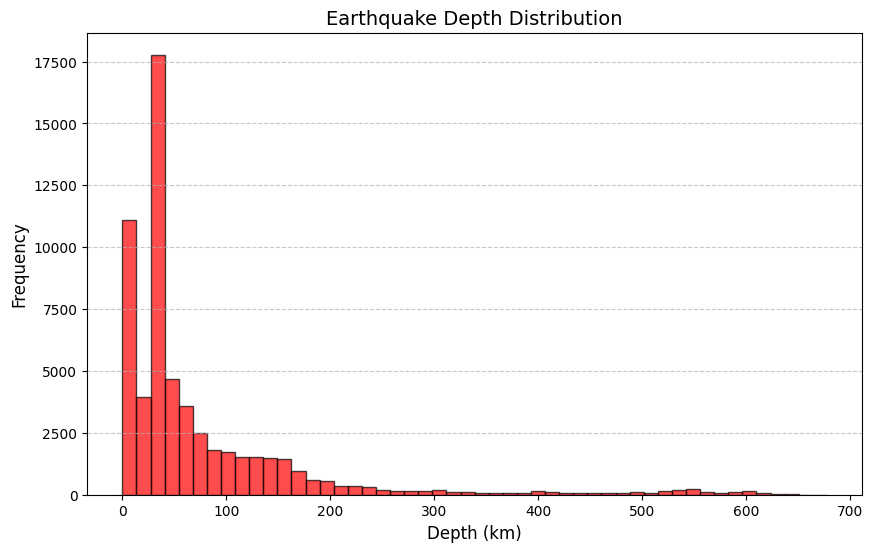

In [11]:
# Create histogram
plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(full_dataset["depth"], bins=50, color="red", edgecolor="black", alpha=0.7)

# Labels and title
plt.xlabel("Depth (km)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Earthquake Depth Distribution", fontsize=14)

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

The histogram visualization of the **`depth`** column reveals a highly skewed distribution, with most earthquake events occurring at depths between 0 and less than 200 km. This confirms that the majority of earthquakes in the dataset are shallow to intermediate-depth earthquakes, which are commonly associated with tectonic activity in subduction zones and fault systems. The skewed distribution suggests that deep-focus earthquakes (beyond 200 km) are relatively rare in this dataset, reinforcing the geological characteristics of the Indonesian region, where shallow and intermediate earthquakes dominate due to active plate boundaries.  

Although some depth values are significantly high, these are not considered outliers since deep-focus earthquakes naturally occur in subduction zones. Therefore, no outlier removal is necessary for this column. With this analysis complete, we can move on to the next step.

In [12]:
# Display descriptive statistics of the 'depth' column (transposed)
full_dataset['mag'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
mag,59570.0,4.51472,0.424409,3.0,4.2,4.4,4.7,9.1


The descriptive statistics of the **`mag`** (magnitude) column provide valuable insights into the distribution of earthquake magnitudes in the dataset.  

- The mean magnitude is approximately 4.51, indicating that most recorded earthquakes are moderate in strength.  
- The standard deviation (0.42) suggests that the majority of earthquakes have magnitudes close to the mean, with relatively low variability.  
- The minimum recorded magnitude is 3.0, while the maximum reaches 9.1, representing a very strong earthquake.  
- The interquartile range (IQR) shows that 50% of the data falls between 4.2 and 4.7, meaning that most earthquakes in this dataset are within the lower-to-moderate magnitude range.  

Additionally, as per the data collection requirements, the dataset was expected to include only earthquakes with a minimum magnitude of 3.0. The statistics confirm that this requirement is met, as the lowest recorded magnitude in the dataset is exactly 3.0.    


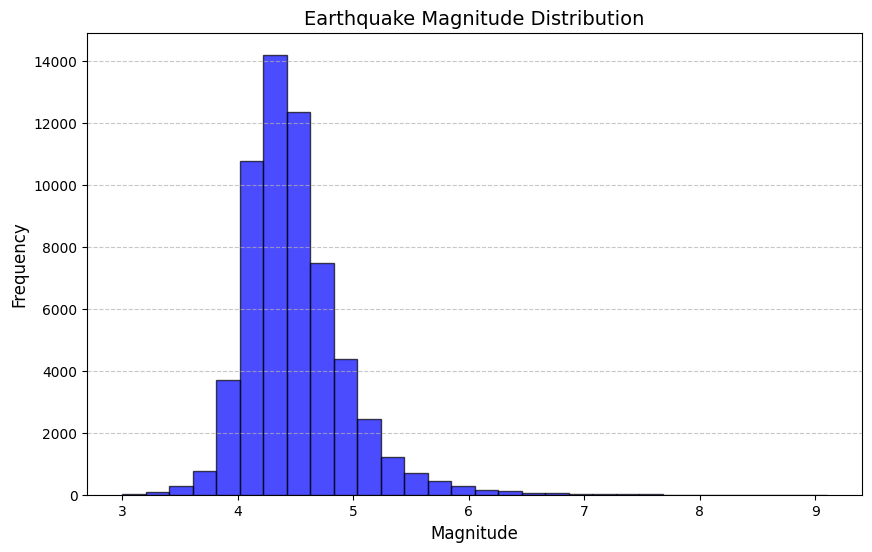

In [13]:
# Create histogram for magnitude
plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(full_dataset["mag"], bins=30, color="blue", edgecolor="black", alpha=0.7)

# Labels and title
plt.xlabel("Magnitude", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Earthquake Magnitude Distribution", fontsize=14)

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

The histogram visualization of the **`mag`** (magnitude) column provides a clearer view of the distribution of earthquake magnitudes in this dataset.  

- The majority of recorded earthquakes have magnitudes ranging from 3.8 to 5.2, indicating that moderate earthquakes dominate this dataset.  
- This finding aligns with the descriptive statistics, where the median magnitude is 4.4, and the interquartile range (IQR) lies between 4.2 and 4.7.  
- The distribution is slightly skewed to the right (toward lower values), meaning that smaller magnitudes occur more frequently than larger ones.  
- Only a small number of high-magnitude earthquakes (above 6.0) are present in the dataset.  

This visualization further confirms that the dataset consists mainly of moderate-magnitude earthquakes. With this, the analysis of the **`mag`** column is complete, and we can now proceed to the next step.  


In [14]:
# Count occurrences of each magnitude type
mag_type_counts = full_dataset["magType"].value_counts()

# Display the counts
print(mag_type_counts)

magType
mb     54541
mwc     2886
mww     1609
mwb      456
ml        32
mwr       17
ms        12
md        12
mw         3
Mb         1
m          1
Name: count, dtype: int64


The **`magType`** column represents the magnitude type used to measure each earthquake. Since this column contains categorical data, we first inspect the unique values and their respective counts in the dataset.

From the results, we observe the following magnitude type distribution:

- The most commonly used magnitude type is 'mb', which appears 54,541 times.
- Other notable types include 'mwc' (2,886), 'mww' (1,609), and 'mwb' (456).
- Several less frequent types exist, such as 'ml', 'mwr', 'ms', 'md', 'mw', and 'm', each occurring fewer than 50 times.

However, there is an inconsistency in capitalization. The presence of both 'mb' (54,541) and 'Mb' (1) suggests that 'Mb' is likely a duplicate of 'mb' due to case sensitivity. To ensure data consistency, all values in this column should be converted to lowercase so they are correctly grouped together. After addressing this issue, further analysis can be conducted on this categorical variable.

In [15]:
# Convert all values in 'magType' column to lowercase
full_dataset["magType"] = full_dataset["magType"].str.lower()

# Count occurrences of each magnitude type
mag_type_counts = full_dataset["magType"].value_counts()

# Display the counts
print(mag_type_counts)

magType
mb     54542
mwc     2886
mww     1609
mwb      456
ml        32
mwr       17
ms        12
md        12
mw         3
m          1
Name: count, dtype: int64


The **`magType`** column has been successfully standardized by converting all values to lowercase. This ensures consistency in categorical representation and eliminates discrepancies caused by case sensitivity. After this adjustment, the unique values and their counts remain largely unchanged, with the only difference being the correct grouping of previously misclassified entries.

With this correction, the **`magType`** column is now clean and ready for further analysis.








In [16]:
# Count occurrences of each event type
earthquake_type_counts = full_dataset["type"].value_counts()

# Display the counts
print(earthquake_type_counts)

type
earthquake    59570
Name: count, dtype: int64


The **`type`** column contains categorical data describing the nature of the recorded seismic events. Based on the analysis, all 59,570 entries in this dataset are classified as "earthquake", meaning there are no other event types present.

Since this column lacks variability, it does not provide additional insights for distinguishing different types of seismic activity. As a result, it may not be useful for further analysis and could potentially be excluded from certain modeling or visualization processes.

In [17]:
# Remove the 'type' column from this dataset
full_dataset.drop(columns=['type'], inplace=True)

The **`type`** column has been successfully removed from the dataset. With this step completed, we can now move on to the next stage of the analysis.

In [18]:
# Display descriptive statistics of the 'nst' column (transposed)
full_dataset['nst'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
nst,37929.0,42.070737,55.584436,4.0,14.0,24.0,46.0,701.0


The **`nst`** column represents the number of seismic stations that contributed to determining the earthquake’s location. Since a higher number of stations can improve accuracy, analyzing this column helps assess data reliability.

From the descriptive statistics, we observe the following:

- The dataset contains 37,929 non-null values, meaning there are missing values.
- The number of stations ranges from 4 to 701, with a median of 24 and an average of 42.07.
- The standard deviation is 55.58, indicating significant variability in the number of stations used.
- Most values fall between 14 (25th percentile) and 46 (75th percentile), meaning half of the data lies within this range.

Since this column contains missing values, an appropriate handling method should be determined to ensure complete data for further analysis. In this case, we fill them with a specific placeholder (e.g., -1) to indicate missing data without misleading interpretation. This method is commonly used in machine learning and data preprocessing when you need to handle missing numerical values without distorting the distribution.



In [19]:
# Fill missing values with -1
full_dataset['nst'] = full_dataset['nst'].fillna(-1)

With this adjustment, the **`nst`** column is now complete, and we can proceed with the next step in the data analysis.


In [20]:
# Display descriptive statistics of the 'gap' column (transposed)
full_dataset['gap'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
gap,54806.0,108.811526,50.283047,8.7,70.4,103.0,142.0,346.9


The **`gap`** column represents the azimuthal gap between the seismic stations used to locate the earthquake. This value is measured in degrees and indicates the largest angle without a seismic station when looking from the earthquake's epicenter.  

From the descriptive statistics, we observe that:  
- The minimum gap is 8.7 degrees, suggesting a well-distributed station network in some cases.  
- The median gap is 103.0 degrees, meaning that for half of the recorded earthquakes, there is a gap of over 100 degrees between stations.  
- The maximum gap reaches 346.9 degrees, indicating cases where stations are highly concentrated in one direction, leading to potential location uncertainty.  

To handle the missing values, we have chosen to fill them with -1, his ensures that the dataset remains complete without introducing potential bias.

In [21]:
# Fill missing values with -1
full_dataset.loc[:, 'gap'] = full_dataset['gap'].fillna(-1)

The **`gap`** column’s missing values have been filled with -1 to indicate unknown azimuthal gaps, preserving the dataset's integrity. With these adjustments, the dataset is now clean and consistent for these columns. We are now ready to proceed to the next step.

In [22]:
# Display descriptive statistics of the 'dmin' column (transposed)
full_dataset['dmin'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
dmin,28455.0,2.481514,1.868021,0.006,1.45,2.089,2.979,56.265


The **`dmin`** column represents the distance from the earthquake epicenter to the nearest station, measured in degrees. Based on its descriptive statistics:  

- The dataset contains 28,455 non-null values, meaning a significant portion of entries have missing data.  
- The minimum value is 0.006 degrees, indicating some earthquakes were recorded very close to a station.  
- The median (50%) is 2.089 degrees, suggesting that half of the earthquakes have a station within this distance.  
- The mean (2.48 degrees) and standard deviation (1.87 degrees) indicate that most values cluster around a relatively small distance.  
- The maximum value is 56.265 degrees, which is considerably larger than the majority of the data, but it may still be valid if the earthquake occurred in a remote area with few nearby stations.  

Given that many values are missing, we need to determine an appropriate way to handle them. One possible approach is to replace missing values with -1 to differentiate them from actual data, similar to how we handled previous columns. This would ensure that missing values are clearly identifiable while preserving the integrity of the dataset.


In [23]:
# Fill missing values with -1
full_dataset.loc[:, 'dmin'] = full_dataset['dmin'].fillna(-1)

The missing values in  **`dmin`** column have been successfully handled. With this step completed, we can now proceed to the next stage of our analysis.  

In [24]:
# Display descriptive statistics of the 'rms' column (transposed)
full_dataset['rms'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
rms,59532.0,0.868779,0.268099,0.02,0.68,0.86,1.05,1.94


The **`rms`** column represents the root mean square (RMS) of the residuals, which indicates the quality of the earthquake's location determination. Key observations from the descriptive statistics:  

- The column has 59,532 non-null values, meaning there is one missing value in the dataset.  
- The mean RMS value is 0.87, with a standard deviation of 0.27, indicating that most values are relatively close to the average.  
- The minimum recorded value is 0.02, while the maximum is **1.94**.  
- The interquartile range (IQR) shows that 50% of the data falls between 0.68 and 1.05, meaning the majority of RMS values are concentrated within this range.  

Since RMS values typically range between 0 and 2, all recorded values appear reasonable, and no extreme outliers are present. The only issue is the single missing value, which we will handle. Since RMS represents deviation, it must always be a non-negative value. Thus, filling missing values with zero (0) or -1 would be illogical, as:  

- Zero (0) would imply no residual error, which is unrealistic.  
- Negative values (-1) do not make sense, as RMS cannot be negative.  

The best approach is to fill the missing values with the median since it is a reasonable central value that aligns with the existing data distribution.   

In [25]:
# Fill missing values with the median value
full_dataset.loc[:, 'rms'] = full_dataset['rms'].fillna(full_dataset['rms'].median())

The **`rms`** column is now completely clean. With this step done, we can now proceed to the next stage of the analysis.

In [26]:
# Count occurrences of each network
net_counts = full_dataset["net"].value_counts()

# Display the counts
print(net_counts)

net
us          59565
official        4
iscgem          1
Name: count, dtype: int64


The **`net`** column represents the network that reported the earthquake events. Since this is a categorical variable, we inspected its unique values and their respective counts.

From the results, we observe that:
- The majority of the data (59,565 entries) were reported by the 'us' network.
- A very small number of records (4 entries) come from the 'official' network.
- Only 1 record comes from the 'iscgem' network.

This indicates that the dataset is heavily dominated by the 'us' network, with only a few records from other sources. Given this distribution, the presence of 'official' and 'iscgem' records is negligible. However, we decided to keep them for completeness, so we can move forward to the next step.

In [27]:
# Count occurrences of each id category
id_counts = full_dataset["id"].value_counts()

# Display the counts
print(id_counts)

id
usp0009kkh    1
us100088sg    1
us1000888j    1
us100088a4    1
us100088bk    1
             ..
usb000szyc    1
usc000t4u5    1
usb000szwg    1
usc000t4ur    1
us6000pxar    1
Name: count, Length: 59570, dtype: int64


The **`id`** column contains a unique identifier for each earthquake event. By inspecting its values, we observe that:

- Each ID appears exactly once in the dataset.
- The dataset contains 59,570 unique IDs, which matches the total number of records.

This confirms that the **`id`** column serves as a primary key for the dataset, uniquely identifying each earthquake event. Since every entry has a unique value, this column does not require any modifications or transformations.


In [28]:
# Show the 'place' records
full_dataset['place'].head()

,place
0,"0 km SE of Hinatuan, Philippines"
1,"15 km WSW of Burias, Philippines"
2,"98 km W of Tobelo, Indonesia"
3,"86 km ENE of Tobelo, Indonesia"
4,"289 km SW of Waingapu, Indonesia"


The **`place`** column contains textual descriptions of earthquake locations, often including distances and directions from known places (e.g., "0 km SE of Hinatuan, Philippines"). To analyze the most frequently mentioned locations, a word cloud visualization is about to be generated.  


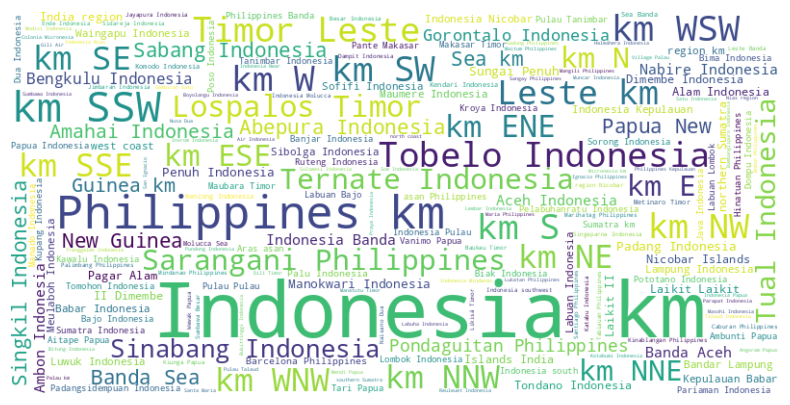

In [29]:
# Combine all text from the 'place' column
text = " ".join(full_dataset['place'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud visualization of the **`place`** column provides insight into the most frequently mentioned locations in the dataset. The largest and most prominent word in the word cloud is 'Indonesia', indicating that the majority of earthquake events recorded in this dataset occurred within or near Indonesia. Other words present in the word cloud likely represent specific regions, cities, or offshore areas where earthquakes have been recorded.  

This insight reinforces the dataset's relevance to the study of earthquakes in Indonesia, supporting further analysis of seismic patterns in the region. Hence, this column is perfectly clean.


In [30]:
# Count occurrences of the event status
status_counts = full_dataset["status"].value_counts()

# Display the counts
print(status_counts)

status
reviewed    59570
Name: count, dtype: int64


Since all values in the **`status`** column are 'reviewed', this indicates that every earthquake record in the dataset has undergone a review process by seismologists or authoritative sources. There are no records marked as 'automatic', which means that the data is already validated and does not require further filtering or cleaning.  

As a result, this column does not provide additional variation or meaningful insights for analysis. Considering its redundancy, it is reasonable to remove this column from the dataset.


In [31]:
# Remove the 'status' column from this dataset
full_dataset.drop(columns=['status'], inplace=True)

The **`status`** column is now removed, we can now proceed to the next stage of the analysis.

In [32]:
# Display descriptive statistics of the 'horizontalError' column (transposed)
full_dataset['horizontalError'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
horizontalError,25969.0,8.255306,2.483554,1.5,6.6,7.99,9.6,30.3


The **`horizontalError`** column represents the uncertainty in the horizontal location of each recorded earthquake. From the descriptive statistics, we observe:

- The dataset contains 25,969 non-missing values, meaning a significant portion of records lack this information.  
- The mean horizontal error is 8.26 km, with a standard deviation of 2.48 km, indicating moderate variation in error values.  
- The minimum error is 1.5 km, while the maximum reaches 30.3 km, suggesting some events have high uncertainty in their reported location.  
- The median (50th percentile) error is 7.99 km, with the interquartile range (6.6 km to 9.6 km) showing that most values fall within this range.  

Since the status column indicates that all data has been reviewed, missing values in this column are likely due to no significant error being recorded rather than missing information. Therefore, it makes the most sense to fill missing values with 0, assuming that these records had no notable horizontal error.  

This approach ensures that the dataset maintains consistency while preserving the reliability of recorded errors.

In [33]:
# Fill missing values with zero
full_dataset.loc[:, 'horizontalError'] = full_dataset['horizontalError'].fillna(0)

The **`horizontalError`** column is now clean, ready for the next analyses.

In [34]:
# Display descriptive statistics of the 'depthError' column (transposed)
full_dataset['depthError'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
depthError,40781.0,9.104539,9.080808,0.0,3.727,7.2,10.4,74.9


The **`depthError`** column represents the uncertainty in the depth measurement of an earthquake. Based on the descriptive statistics:  

- The column contains 40,781 recorded values, meaning a significant number of entries have missing values.  
- The mean depth error is 9.10 km, with a standard deviation of 9.08 km, indicating a fairly wide spread of values.  
- The minimum recorded error is 0.0 km, suggesting some depth measurements were reported with no uncertainty.  
- Most of the values fall between 3.73 km (25th percentile) and 10.4 km (75th percentile).  
- The maximum depth error reaches 74.9 km, meaning some earthquakes had highly uncertain depth measurements.  

Since the status column confirms that all data has been reviewed, missing values in this column likely indicate no significant depth error rather than missing information. Following the same logic as the **`horizontalError`** column, it makes the most sense to fill missing values with 0, assuming these records had no notable depth error.

In [35]:
# Fill missing values with zero
full_dataset.loc[:, 'depthError'] = full_dataset['depthError'].fillna(0)

All missing values in **`depthError`** column are now filled with 0.

In [36]:
# Display descriptive statistics of the 'magError' column (transposed)
full_dataset['magError'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
magError,28280.0,0.132735,0.058439,0.027,0.09,0.126,0.164,0.552


The **`magError`** column represents the uncertainty in the magnitude measurement of an earthquake. Based on the descriptive statistics:  

- The column contains 28,280 recorded values, meaning more than half of the dataset has missing values in this field.  
- The mean magnitude error is 0.133, with a standard deviation of 0.058, indicating that most errors are relatively small.  
- The minimum recorded error is 0.027, while the maximum reaches 0.552, showing a moderate range of variation.  
- The majority of values fall between 0.09 (25th percentile) and 0.164 (75th percentile).  

Since the status column confirms that all data has been reviewed, missing values in this column likely indicate no significant magnitude error rather than an absence of information. Therefore, the most reasonable approach is to fill missing values with 0, assuming that these records had no notable uncertainty in their magnitude measurements.  This method ensures data consistency while preserving the validity of recorded errors.


In [37]:
# Fill missing values with zero
full_dataset.loc[:, 'magError'] = full_dataset['magError'].fillna(0)

All missing values in **`magError`** column are now filled with 0, so we are ready to move to the next step of this analysis.

In [38]:
# Display descriptive statistics of the 'magNst' column (transposed)
full_dataset['magNst'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
magNst,55124.0,18.987846,25.222359,1.0,5.0,11.0,22.0,416.0


The **`magNst`** column represents the number of stations used to calculate the magnitude of an earthquake. Based on the descriptive statistics:

- The column contains 55,124 recorded values, meaning that some records have missing values.
- The mean number of stations used is 18.99, with a relatively high standard deviation of 25.22, indicating substantial variation in station count.
- The minimum value is 1, meaning at least one station was used in some cases, while the maximum reaches 416, showing that some events had extensive station coverage.
- The majority of values fall between 5 (25th percentile) and 22 (75th percentile), suggesting that most earthquakes were measured using a moderate number of stations.

Since the status column confirms that all data has been reviewed, missing values in this column likely indicate unavailable station count data rather than an absence of measurements. Given that missing values may signify unavailable data rather than zero stations, it makes more sense to replace missing values with -1. This choice clearly indicates that the value is missing, without implying that no stations were used in those cases. Thus, filling missing values with -1 will allow us to maintain consistency and avoid confusion.


In [39]:
# Fill missing values with -1
full_dataset.loc[:, 'magNst'] = full_dataset['magNst'].fillna(-1)

The **`magNst`** column is now clean!

In [40]:
# Count occurrences of the locationSource
locationSource_counts = full_dataset["locationSource"].value_counts()

# Display the counts
print(locationSource_counts)

locationSource
us        59531
dja          34
aust          4
iscgem        1
Name: count, dtype: int64


The **`locationSource`** column represents the source responsible for determining the earthquake's location. Based on the distribution:

- The vast majority of location data (59,531 records) comes from 'us', indicating that the United States Geological Survey (USGS) is the primary source.
- A small number of records come from other sources: 'dja' accounts for 34 records,  'aust' contributes 4 records, and 'iscgem' appears only once.

This distribution suggests that most earthquake locations were determined by a single, dominant source ('us'), while a few were sourced from other agencies. Since all data has been reviewed (as seen in the **`status`** column), these variations are likely legitimate and not due to errors. No immediate cleaning or modifications are necessary for this column.


In [41]:
# Count occurrences of the magSource
magSource_counts = full_dataset["magSource"].value_counts()

# Display the counts
print(magSource_counts)

magSource
us          56747
hrv          1683
gcmt         1093
dja            37
aust            4
official        4
iscgem          1
us_gcmt         1
Name: count, dtype: int64


The **`magSource`** column represents the source responsible for determining the earthquake's magnitude. Based on the distribution:

- The majority of the records (56,747) come from 'us'.
- Other sources contributing notable amounts include 'hrv' with 1,683 records, and 'gcmt' with 1,093 records.
- A few sources have minimal representation, including 'dja' (37 records), 'aust' (4 records), 'official' (4 records), and 'iscgem' and 'us_gcmt' appear only once each.

This distribution shows that most magnitude values were determined by a single leading agency ('us'), with additional sources contributing smaller amounts. Given that all records have been reviewed (as confirmed by the **`status`** column), these variations are likely valid and do not require corrections.



In [42]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59570 entries, 0 to 59569
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             59570 non-null  object 
 1   latitude         59570 non-null  float64
 2   longitude        59570 non-null  float64
 3   depth            59570 non-null  float64
 4   mag              59570 non-null  float64
 5   magType          59570 non-null  object 
 6   nst              59570 non-null  float64
 7   gap              59570 non-null  float64
 8   dmin             59570 non-null  float64
 9   rms              59570 non-null  float64
 10  net              59570 non-null  object 
 11  id               59570 non-null  object 
 12  updated          59570 non-null  object 
 13  place            59570 non-null  object 
 14  horizontalError  59570 non-null  float64
 15  depthError       59570 non-null  float64
 16  magError         59570 non-null  float64
 17  magNst      

The dataset is perfectly clean right now!

# **DATA TRANSFORMATION**

In [43]:
# Define the correct column order and names
clean_dataset_column_names = {
    "id": "id",
    "date": "event_date",
    "time": "event_time",
    "latitude": "latitude",
    "longitude": "longitude",
    "depth": "depth",
    "mag": "magnitude",
    "magType": "magnitude_type",
    "place": "place",
    "nst": "nst",
    "gap": "gap",
    "dmin": "dmin",
    "rms": "rms",
    "net": "net",
    "date_update": "update_date",
    "time_update": "update_time",
    "horizontalError": "horizontal_error",
    "depthError": "depth_error",
    "magError": "magnitude_error",
    "magNst": "magnitude_nst",
    "locationSource": "location_source",
    "magSource": "magnitude_source"
}

# Reorder and rename the columns
clean_dataset = full_dataset.rename(columns=clean_dataset_column_names)[list(clean_dataset_column_names.values())]

# Display the first few rows to verify
clean_dataset.head()

,id,event_date,event_time,latitude,longitude,depth,magnitude,magnitude_type,place,nst,...,rms,net,update_date,update_time,horizontal_error,depth_error,magnitude_error,magnitude_nst,location_source,magnitude_source
0,usp0009kkh,2000-01-01,07:50:00,8.370,126.336,100.7,4.5,mb,"0 km SE of Hinatuan, Philippines",-1.0,...,1.11,us,2014-11-07,01:09:15,0.0,7.1,0.0,1.0,us,us
1,usp0009knf,2000-01-02,12:46:58,5.642,125.140,73.7,4.9,mb,"15 km WSW of Burias, Philippines",-1.0,...,0.93,us,2014-11-07,01:09:16,0.0,5.5,0.0,23.0,us,us
2,usp0009kp5,2000-01-02,18:43:31,1.902,127.137,33.0,4.4,mb,"98 km W of Tobelo, Indonesia",-1.0,...,0.54,us,2014-11-07,01:09:16,0.0,0.0,0.0,5.0,us,us
3,usp0009kq1,2000-01-03,13:01:31,2.114,128.688,71.8,4.7,mb,"86 km ENE of Tobelo, Indonesia",-1.0,...,1.00,us,2014-11-07,01:09:16,0.0,15.3,0.0,1.0,us,us
4,usp0009kq2,2000-01-03,14:32:15,-11.539,118.421,33.0,4.7,mb,"289 km SW of Waingapu, Indonesia",-1.0,...,1.50,us,2014-11-07,01:09:16,0.0,0.0,0.0,2.0,us,us


In [44]:
# Show the description of the clean dataset
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59570 entries, 0 to 59569
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                59570 non-null  object 
 1   event_date        59570 non-null  object 
 2   event_time        59570 non-null  object 
 3   latitude          59570 non-null  float64
 4   longitude         59570 non-null  float64
 5   depth             59570 non-null  float64
 6   magnitude         59570 non-null  float64
 7   magnitude_type    59570 non-null  object 
 8   place             59570 non-null  object 
 9   nst               59570 non-null  float64
 10  gap               59570 non-null  float64
 11  dmin              59570 non-null  float64
 12  rms               59570 non-null  float64
 13  net               59570 non-null  object 
 14  update_date       59570 non-null  object 
 15  update_time       59570 non-null  object 
 16  horizontal_error  59570 non-null  float6

In [45]:
# Save the new dataset to a CSV file
clean_dataset.to_csv("/content/drive/MyDrive/Analysis/Indonesian Earthquake Data/[Clean]_2000-7 3 2025_Indonesian_Earthquake_Data_mag3+.csv", index=False)